# Dataset Info.


1,000,000개의 데이터
* ID : 샘플 고유 id
* 항공편 운항 관련 정보
* Month: 해당 항공편의 출발 월
* Day_of_Month: Month에 해당하는 월의 날짜
* Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
* Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
* Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
* Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
* Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
* Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
* Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
* Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
* Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
* Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
* Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
* Airline: 해당 항공편을 운항하는 항공사
* Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 (IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
* Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
* Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호
* Delay: 항공편 지연 여부 (Not_Delayed, Delayed)
예측해야 하는 타깃 <br>
다수의 데이터에 레이블이 존재하지 않음 <br>
준지도학습을 통해 레이블링 가능 <br>


test.csv [파일]
1,000,000개의 데이터
* ID : 샘플 고유 id
* 항공편 운항 관련 정보
* Month: 해당 항공편의 출발 월
* Day_of_Month: Month에 해당하는 월의 날짜
* Estimated_Departure_Time: 전산 시스템을 바탕으로 측정된 비행기의 출발 시간 (HH:MM 형식)
* Estimated_Arrival_Time: 전산 시스템을 바탕으로 측정된 비행기의 도착 시간 (HH:MM 형식)
* Cancelled: 해당 항공편의 취소 여부 (0: 취소되지 않음, 1: 취소됨)
* Diverted: 해당 항공편의 경유 여부 (0: 취소되지 않음, 1: 취소됨)
* Origin_Airport: 해당 항공편 출발 공항의 고유 코드 (IATA 공항 코드)
* Origin_Airport_ID: 해당 항공편 출발 공항의 고유 ID (US DOT ID)
* Origin_State: 해당 항공편 출발 공항이 위치한 주의 이름
* Destination_Airport: 해당 항공편 도착 공항의 고유 코드 (IATA 공항 코드)
* Destination_Airport_ID: 해당 항공편 도착 공항의 고유 ID (US DOT ID)
* Destination_State: 해당 항공편 도착 공항이 위치한 주의 이름
* Distance: 출발 공항과 도착 공항 사이의 거리 (mile 단위)
* Airline: 해당 항공편을 운항하는 항공사
* Carrier_Code(IATA): 해당 항공편을 운항하는 항공사의 고유 코드 (IATA 공항 코드, 단 다른 항공사가 같은 코드를 보유할 수도 있음)
* Carrier_ID(DOT): 해당 항공편을 운항하는 항공사의 고유 ID (US DOT ID)
* Tail_Number: 해당 항공편을 운항하는 항공기의 고유 등록번호

In [1]:
import pandas as pd
import numpy as np
import random
import os
import gc

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from missingno import matrix

In [2]:
train = pd.read_parquet('../Raw_Data/train.parquet')
test = pd.read_parquet('../Raw_Data/test.parquet')
sample_submission = pd.read_csv('../Submission/sample_submission.csv',index_col = 0)
train_backup = train.copy()

## EDA


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 19 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ID                        1000000 non-null  object 
 1   Month                     1000000 non-null  int64  
 2   Day_of_Month              1000000 non-null  int64  
 3   Estimated_Departure_Time  890981 non-null   float64
 4   Estimated_Arrival_Time    890960 non-null   float64
 5   Cancelled                 1000000 non-null  int64  
 6   Diverted                  1000000 non-null  int64  
 7   Origin_Airport            1000000 non-null  object 
 8   Origin_Airport_ID         1000000 non-null  int64  
 9   Origin_State              890985 non-null   object 
 10  Destination_Airport       1000000 non-null  object 
 11  Destination_Airport_ID    1000000 non-null  int64  
 12  Destination_State         890921 non-null   object 
 13  Distance                  10

In [4]:
train.nunique()

ID                          1000000
Month                            12
Day_of_Month                     31
Estimated_Departure_Time       1365
Estimated_Arrival_Time         1428
Cancelled                         1
Diverted                          1
Origin_Airport                  374
Origin_Airport_ID               374
Origin_State                     52
Destination_Airport             375
Destination_Airport_ID          375
Destination_State                52
Distance                       1597
Airline                          28
Carrier_Code(IATA)               11
Carrier_ID(DOT)                  28
Tail_Number                    6430
Delay                             2
dtype: int64

In [5]:
# Replace variables with missing values except for the label (Delay) with the most frequent values of the training data
# 컬럼의 누락된 값은 훈련 데이터에서 해당 컬럼의 최빈값으로 대체됩니다.
NaN_col = ['Origin_State','Destination_State','Airline','Estimated_Departure_Time', 'Estimated_Arrival_Time','Carrier_Code(IATA)','Carrier_ID(DOT)']

for col in NaN_col:
    mode = train[col].mode()[0]
    train[col] = train[col].fillna(mode)
    
    if col in test.columns:
        test[col] = test[col].fillna(mode)
print('Done.')

Done.


In [6]:
# Quantify qualitative variables
# 정성적 변수는 LabelEncoder를 사용하여 숫자로 인코딩됩니다.
# qual_col = ['Origin_Airport', 'Origin_State', 'Destination_Airport', 'Destination_State', 'Airline', 'Carrier_Code(IATA)', 'Tail_Number']

# for i in qual_col:
#     le = LabelEncoder()
#     le = le.fit(train[i])
#     train[i] = le.transform(train[i])
    
#     for label in np.unique(test[i]):
#         if label not in le.classes_:
#             le.classes_ = np.append(le.classes_, label)
#     test[i] = le.transform(test[i])
# print('Done.')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


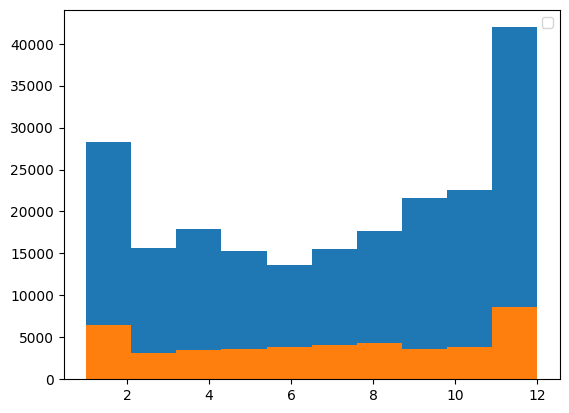

In [7]:
import matplotlib.pyplot as plt
train_2 = train.dropna(subset = 'Delay')
filt = train['Delay'] =='Not_Delayed'
plt.hist(train_2['Month'][filt])
plt.hist(train_2['Month'][-filt])
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


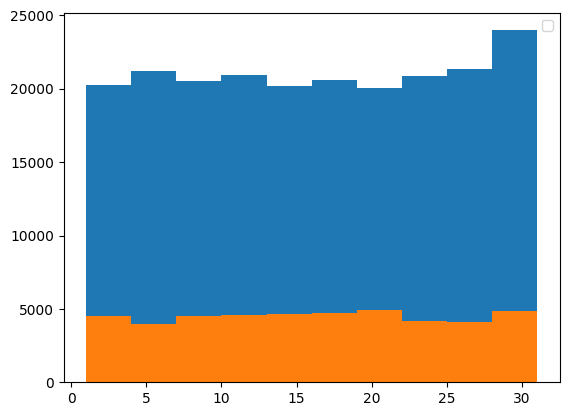

In [8]:
plt.hist(train_2['Day_of_Month'][filt])
plt.hist(train_2['Day_of_Month'][-filt])
plt.legend()

# 1 출발시간 - 도착시간이 영향이 있을 것이다

In [9]:
# Train.dropna,Test.dropna
train = train.dropna(subset = ['Estimated_Arrival_Time','Estimated_Departure_Time'])
test = test.dropna(subset = ['Estimated_Arrival_Time','Estimated_Departure_Time'])

In [10]:
def transform_time(col1,col2):
    col1_T= col1.apply(lambda x:int('{0:04.0f}'.format(x)[0:2])) # To Hour
    col1_M= col2.apply(lambda x:int('{0:04.0f}'.format(x)[2:])) # To Minute
    
    col2_T= col2.apply(lambda x:int('{0:04.0f}'.format(x)[0:2])) # To Hour
    col2_M= col2.apply(lambda x:int('{0:04.0f}'.format(x)[2:])) # To Minute

    return col1_T, col1_M , col2_T, col2_M


In [11]:
train['Arr_hour'],train['Arr_min'],train['Dep_H'],train['Dep_M']= transform_time(train['Estimated_Arrival_Time'],train['Estimated_Departure_Time'])

test['Arr_hour'],test['Arr_min'],test['Dep_H'],test['Dep_M']= transform_time(test['Estimated_Arrival_Time'],test['Estimated_Departure_Time'])


In [12]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Distance,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Arr_hour,Arr_min,Dep_H,Dep_M
0,TRAIN_000000,4,15,600.0,1900.0,0,0,OKC,13851,Oklahoma,...,419.0,Southwest Airlines Co.,WN,19393.0,N7858A,None,19,0,6,0
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,1250.0,SkyWest Airlines Inc.,UA,20304.0,N125SY,None,10,40,7,40
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,544.0,American Airlines Inc.,AA,19805.0,N103US,None,18,10,16,10
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,2454.0,United Air Lines Inc.,UA,19393.0,N595UA,None,17,5,9,5
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,250.0,SkyWest Airlines Inc.,UA,20304.0,N161SY,None,10,0,9,0


In [13]:
def mk_Arr_Time(df:pd.DataFrame):
    list1 = []
    
    for id in df.index:
        
        if df.loc[id,'Arr_hour'] ==24:
            list1.append(pd.Timestamp(year = 2023,
                month =df['Month'][id],
                day = df['Day_of_Month'][id]+1,
                hour = 0,
                minute =df['Arr_min'][id]))
            
        elif df.loc[id,'Arr_min'] ==60:
            list1.append( pd.Timestamp(year = 2023,
                    month = df['Month'][id],
                    day = df['Day_of_Month'][id],
                    hour = df['Arr_hour'][id]+1,
                    minute =0))
            
        elif (df.loc[id,'Arr_hour'] ==24) & (df.loc[id,'Arr_min'] ==60):
            list1.append(pd.Timestamp(year = 2023,
                        month = df['Month'][id],
                    day = df['Day_of_Month'][id]+1,
                    hour = 0,
                    minute =0))
        else:
            list1.append(pd.Timestamp(year = 2023,
                    month = df['Month'][id],
                    day = df['Day_of_Month'][id],
                    hour = df['Arr_hour'][id],
                    minute =df['Arr_min'][id]))
    return list1

In [14]:
def mk_Dep_Time(df:pd.DataFrame):
    list1 = []
    
    for id in df.index:
        
        if df.loc[id,'Dep_H'] ==24:
            list1.append(pd.Timestamp(year = 2023,
                month =df['Month'][id],
                day = df['Day_of_Month'][id]+1,
                hour = 0,
                minute =df['Dep_M'][id]))
            
        elif df.loc[id,'Dep_M'] ==60:
            list1.append( pd.Timestamp(year = 2023,
                    month = df['Month'][id],
                    day = df['Day_of_Month'][id],
                    hour = df['Dep_H'][id]+1,
                    minute =0))
            
        elif (df.loc[id,'Dep_H'] ==24) & (df.loc[id,'Dep_M'] ==60):
            list1.append(pd.Timestamp(year = 2023,
                        month = df['Month'][id],
                    day = df['Day_of_Month'][id]+1,
                    hour = 0,
                    minute =0))
        else:
            list1.append(pd.Timestamp(year = 2023,
                    month = df['Month'][id],
                    day = df['Day_of_Month'][id],
                    hour = df['Dep_H'][id],
                    minute =df['Dep_M'][id]))
    return list1

In [15]:
train['Arr_Time'] = mk_Arr_Time(train)
test['Arr_Time'] = mk_Arr_Time(test)

train['Dep_Time'] = mk_Dep_Time(train)
test['Dep_Time'] = mk_Dep_Time(test)

In [16]:
# train, test 데이터셋 shape
print(train.shape, test.shape)

(1000000, 25) (1000000, 24)


In [17]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Delay,Arr_hour,Arr_min,Dep_H,Dep_M,Arr_Time,Dep_Time
0,TRAIN_000000,4,15,600.0,1900.0,0,0,OKC,13851,Oklahoma,...,WN,19393.0,N7858A,None,19,0,6,0,2023-04-15 19:00:00,2023-04-15 06:00:00
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,UA,20304.0,N125SY,None,10,40,7,40,2023-08-15 10:40:00,2023-08-15 07:40:00
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,AA,19805.0,N103US,None,18,10,16,10,2023-09-06 18:10:00,2023-09-06 16:10:00
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,UA,19393.0,N595UA,None,17,5,9,5,2023-07-10 17:05:00,2023-07-10 09:05:00
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,UA,20304.0,N161SY,None,10,0,9,0,2023-01-11 10:00:00,2023-01-11 09:00:00


In [18]:
train['flight_time'] = train['Arr_Time'] - train['Dep_Time']
test['flight_time'] = test['Arr_Time'] - test['Dep_Time']

In [19]:
train.head()

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Carrier_ID(DOT),Tail_Number,Delay,Arr_hour,Arr_min,Dep_H,Dep_M,Arr_Time,Dep_Time,flight_time
0,TRAIN_000000,4,15,600.0,1900.0,0,0,OKC,13851,Oklahoma,...,19393.0,N7858A,None,19,0,6,0,2023-04-15 19:00:00,2023-04-15 06:00:00,0 days 13:00:00
1,TRAIN_000001,8,15,740.0,1024.0,0,0,ORD,13930,Illinois,...,20304.0,N125SY,None,10,40,7,40,2023-08-15 10:40:00,2023-08-15 07:40:00,0 days 03:00:00
2,TRAIN_000002,9,6,1610.0,1805.0,0,0,CLT,11057,North Carolina,...,19805.0,N103US,None,18,10,16,10,2023-09-06 18:10:00,2023-09-06 16:10:00,0 days 02:00:00
3,TRAIN_000003,7,10,905.0,1735.0,0,0,LAX,12892,California,...,19393.0,N595UA,None,17,5,9,5,2023-07-10 17:05:00,2023-07-10 09:05:00,0 days 08:00:00
4,TRAIN_000004,1,11,900.0,1019.0,0,0,SFO,14771,California,...,20304.0,N161SY,None,10,0,9,0,2023-01-11 10:00:00,2023-01-11 09:00:00,0 days 01:00:00


In [31]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
M = oh.fit_transform(train['Month'].values.reshape(-1,1))
M = M.toarray()
M = pd.DataFrame(M)
D = oh.fit_transform(train['Day_of_Month'].values.reshape(-1,1))
D = D.toarray()
D= pd.DataFrame(D)

In [22]:
train['flight_time_1'] = abs(train['flight_time']/ np.timedelta64(1,'h'))

In [36]:
train_3 = pd.concat([M,D, train[['flight_time_1','Delay']]],axis=1)

In [37]:
sample_submission

column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train_3.loc[:, 'Delay_num'] = train_3['Delay'].apply(lambda x: to_number(x, column_number))
print('Done.')

train_x = train_3.drop(columns=['Delay', 'Delay_num'])
train_y = train_3['Delay_num']
# test_x = test.drop(columns=['ID'])


KeyError: None

In [ ]:
train.head(3)

,ID,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,...,Delay,Arrive_Hour,Arrive_Min,Depature_Hour,Depature_Min,Arrive_Time,Depature_Time,flight_time,time_per distnace,Delay_num
5,TRAIN_000005,4,13,1545.0,1900.0,0,0,119,11618,4,...,Not_Delayed,19,0,15,45,2023-04-13 19:00:00,2023-04-13 15:45:00,0 days 03:15:00,1.8,0
6,TRAIN_000006,1,20,1742.0,1903.0,0,0,119,11618,28,...,Not_Delayed,19,3,17,42,2023-01-20 19:03:00,2023-01-20 17:42:00,0 days 01:21:00,0.8,0
8,TRAIN_000008,6,13,1420.0,1550.0,0,0,59,10821,4,...,Not_Delayed,15,50,14,20,2023-06-13 15:50:00,2023-06-13 14:20:00,0 days 01:30:00,0.4,0


In [ ]:
train.columns

Index(['ID', 'Month', 'Day_of_Month', 'Estimated_Departure_Time',
       'Estimated_Arrival_Time', 'Cancelled', 'Diverted', 'Origin_Airport',
       'Origin_Airport_ID', 'Origin_State', 'Destination_Airport',
       'Destination_Airport_ID', 'Destination_State', 'Distance', 'Airline',
       'Carrier_Code(IATA)', 'Carrier_ID(DOT)', 'Tail_Number', 'Delay',
       'Arrive_Hour', 'Arrive_Min', 'Depature_Hour', 'Depature_Min',
       'Arrive_Time', 'Depature_Time', 'flight_time', 'time_per distnace',
       'Delay_num'],
      dtype='object')

In [ ]:
train_x = train['time_per distnace']
train_x

5         1.8
6         0.8
8         0.4
10        0.6
12        0.1
         ... 
999962    1.3
999963    0.8
999969    0.4
999985    0.3
999992    0.3
Name: time_per distnace, Length: 255001, dtype: float64

C:\Users\user\AppData\Local\Temp\ipykernel_25296\1781094992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr(method='spearman')


,Month,Day_of_Month,Estimated_Departure_Time,Estimated_Arrival_Time,Cancelled,Diverted,Origin_Airport,Origin_Airport_ID,Origin_State,Destination_Airport,...,Airline,Carrier_Code(IATA),Carrier_ID(DOT),Tail_Number,Arrive_Hour,Arrive_Min,Depature_Hour,Depature_Min,time_per distnace,Delay_num
Month,1.000000,0.002448,-0.002833,-0.005143,NaN,NaN,-0.008012,-0.008051,0.018222,-0.008601,...,-0.081200,-0.107101,0.022446,0.010167,-0.005486,0.001311,-0.002683,-0.000930,0.012925,-0.018515
Day_of_Month,0.002448,1.000000,-0.003386,0.000111,NaN,NaN,-0.002314,-0.002359,-0.001445,0.000936,...,-0.001529,-0.001166,0.002439,-0.002830,0.000071,0.000896,-0.003381,0.000325,0.000160,-0.003908
Estimated_Departure_Time,-0.002833,-0.003386,1.000000,0.594352,NaN,NaN,-0.016332,-0.016431,-0.012884,0.021748,...,0.001833,-0.001997,0.004793,0.000229,0.587976,0.006196,0.997237,0.342120,-0.334526,0.114972
Estimated_Arrival_Time,-0.005143,0.000111,0.594352,1.000000,NaN,NaN,0.000019,-0.000097,-0.012709,0.014722,...,-0.001523,-0.002120,-0.001893,0.001004,0.997542,-0.107917,0.604118,0.075644,0.166821,0.119665
Cancelled,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Diverted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin_Airport,-0.008012,-0.002314,-0.016332,0.000019,NaN,NaN,1.000000,0.999719,-0.118386,0.021532,...,0.022296,0.023703,-0.028158,-0.045811,-0.000741,0.003628,-0.017137,-0.004092,0.041775,-0.004075
Origin_Airport_ID,-0.008051,-0.002359,-0.016431,-0.000097,NaN,NaN,0.999719,1.000000,-0.118641,0.021338,...,0.022733,0.023724,-0.028458,-0.045278,-0.000857,0.003597,-0.017238,-0.004131,0.041819,-0.004095
Origin_State,0.018222,-0.001445,-0.012884,-0.012709,NaN,NaN,-0.118386,-0.118641,1.000000,-0.049058,...,-0.085378,-0.093644,0.083494,-0.033486,-0.012813,-0.000139,-0.013121,0.000599,0.008161,0.001731
Destination_Airport,-0.008601,0.000936,0.021748,0.014722,NaN,NaN,0.021532,0.021338,-0.049058,1.000000,...,0.021300,0.021581,-0.026986,-0.043708,0.014303,0.003205,0.021790,0.003862,-0.101481,0.008096


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size=0.2, random_state=42)

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Model and hyperparameter tuning using GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
model = RandomForestClassifier(random_state=42)
lr = LogisticRegression()
param_grid = {

    'penalty': ['l1','l2','elasticnet','none'],
    'C': [0.5,0.6,0.7,0.8],
}

grid = GridSearchCV(lr,
                    param_grid,
                    cv=cv,
                    scoring='accuracy',
                    n_jobs=-1,
                    verbose=1)

grid.fit(train_x, train_y)

best_model = grid.best_estimator_


Fitting 5 folds for each of 16 candidates, totalling 80 fits


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\user\AppData\Local\Programs\Python\P

In [ ]:
y_pred = best_model.predict_proba(test_x)
submission = pd.DataFrame(data = y_pred, columns= sample_submission.columns, index = sample_submission.index)
submission.to_csv('230412_2_submission.csv', index=True)